In [82]:
import csv

In [83]:
import os

current_dir = os.getcwd()
root_dir_relative = 'PHY04/sample_rate_100'
root_dir = os.path.abspath(os.path.join(current_dir, root_dir_relative))

dat_paths = []
for dirpath, dirnames, filenames in os.walk(root_dir):
    for filename in filenames:
        if filename.endswith('.dat'):
            dat_paths.append(os.path.join(dirpath, filename))


In [84]:
# 读取文件内容
with open(dat_paths[0], 'r', encoding='cp1252') as file:
    lines = file.readlines()

# 创建字典来存储参数
parameters = {}

# 逐行读取文件内容
for line in lines:
    # 去除行首尾的空白符
    line = line.strip()
    # 忽略空行和注释行
    if not line or line.startswith('#'):
        continue
    # 如果行包含等号，则将其解析为键值对
    if '=' in line:
        key, value = line.split('=')
        parameters[key.strip()] = value.strip()

# 打印参数
print("[front_panel] Parameters:")
for key, value in parameters.items():
    print(f"{key}: {value}")

[front_panel] Parameters:
mode: T1 - R1
output: 5 dB
gain: 5 dB
probe1: 1 MHz
probe2: no probe
selection: 2
samplerate: 0
begin: 0
end: 100
sound speed: 1480
units: 0
fft filter: 0
fft middle: 2
fft width: 2
fft gate: 5
cepstrum filter: 0
cepstrum middle: 0
cepstrum width: 20
cepstrum gate: 20


In [85]:
# 读取数据表格
data_start = False
# data = []
times, hfs, amps = [], [], []

for line in lines:
    if line.startswith("Depth ["):
        data_start = True
        continue
    if data_start and line.strip():
        # data.append(line.strip().split())
        time, hf, amp = line.strip().split()
        times.append(float(time))
        hfs.append(float(hf))
        amps.append(float(amp))

In [86]:
amps

[0.465,
 0.4801,
 0.4953,
 0.5107,
 0.5261,
 0.5416,
 0.5571,
 0.5727,
 0.5883,
 0.6038,
 0.6194,
 0.6349,
 0.6503,
 0.6656,
 0.6808,
 0.6959,
 0.7109,
 0.7257,
 0.7403,
 0.7547,
 0.7689,
 0.7829,
 0.7967,
 0.8102,
 0.8234,
 0.8363,
 0.849,
 0.8614,
 0.8735,
 0.8852,
 0.8967,
 0.9078,
 0.9186,
 0.9291,
 0.9393,
 0.9491,
 0.9587,
 0.9678,
 0.9767,
 0.9852,
 0.9935,
 1.0014,
 1.009,
 1.0163,
 1.0233,
 1.03,
 1.0364,
 1.0425,
 1.0484,
 1.054,
 1.0593,
 1.0644,
 1.0692,
 1.0737,
 1.078,
 1.0821,
 1.0859,
 1.0896,
 1.0929,
 1.0961,
 1.0991,
 1.1018,
 1.1043,
 1.1067,
 1.1088,
 1.1107,
 1.1124,
 1.1139,
 1.1153,
 1.1164,
 1.1173,
 1.1181,
 1.1186,
 1.119,
 1.1192,
 1.1192,
 1.119,
 1.1186,
 1.1181,
 1.1173,
 1.1164,
 1.1154,
 1.1141,
 1.1127,
 1.1112,
 1.1094,
 1.1075,
 1.1055,
 1.1033,
 1.101,
 1.0986,
 1.096,
 1.0933,
 1.0905,
 1.0876,
 1.0846,
 1.0815,
 1.0783,
 1.0751,
 1.0718,
 1.0684,
 1.0649,
 1.0614,
 1.0579,
 1.0544,
 1.0508,
 1.0472,
 1.0436,
 1.04,
 1.0364,
 1.0329,
 1.0293,
 1.02

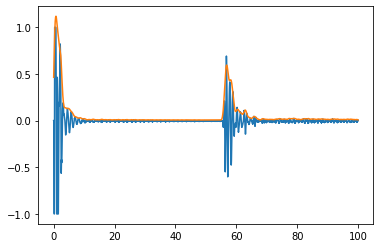

In [87]:
import matplotlib.pyplot as plt
plt.plot(times, hfs)
plt.plot(times, amps)
# plt.xlim(0,10)
# plt.xlim(123,135)